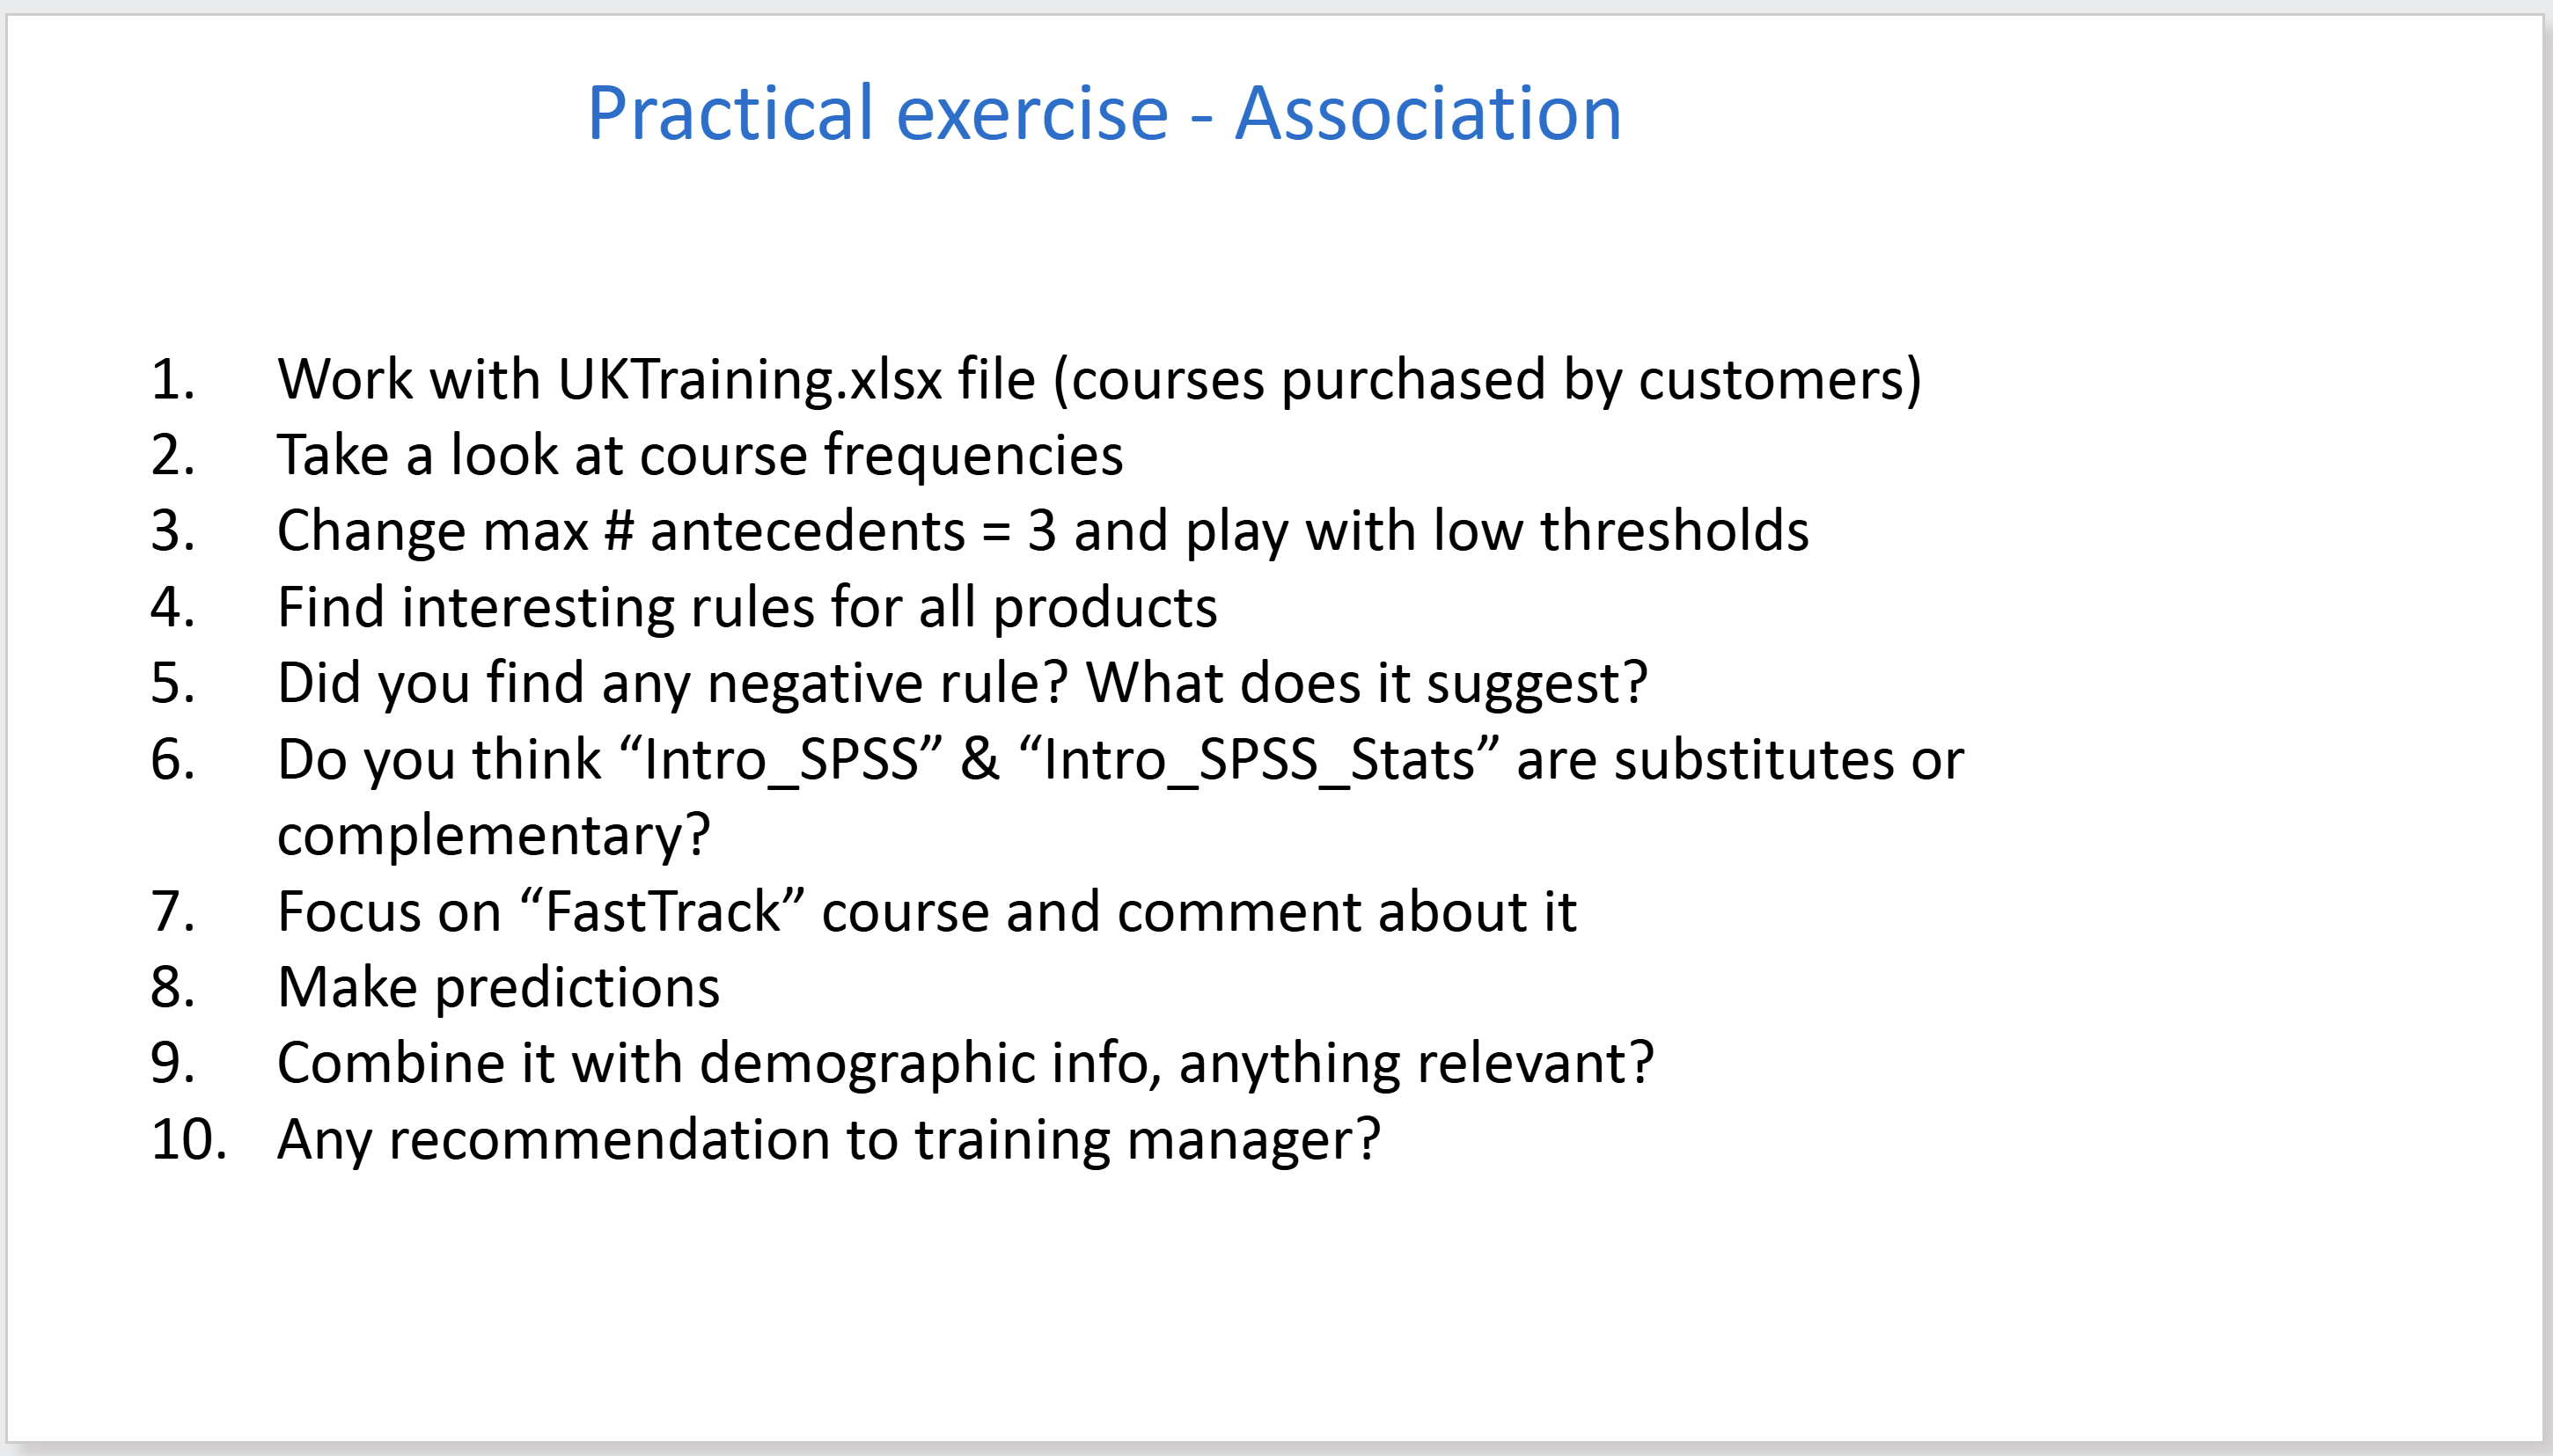

In [1]:
# Import libraries and declare main arrays
import numpy as np
import pandas as pd
from itertools import combinations

metric_dict = {
    "antecedent support": lambda _, sA, __: sA,
    "consequent support": lambda _, sA, __: sC,
    "confidence": lambda sAC, sA, _: sAC/sA,
    "rule support": lambda sAC, _, __: sAC,
    "conf.difference": lambda sAC, sA, sC: abs(metric_dict["confidence"](sAC, sA, sC)-sC),
    "conf.ratio": lambda sAC, sA, sC: 1-np.minimum(sAC/sA, sC)/np.maximum(sAC/sA, sC),
    "lift": lambda sAC, sA, sC: metric_dict["confidence"](sAC, sA, sC)/sC
    }

columns_ordered = ["antecedent support", "consequent support", 
                   "confidence", "rule support", "lift",
                   "conf.difference", "conf.ratio"]

In [2]:
# Apriori function taken from mlxtend library: https://pypi.python.org/pypi/mlxtend
def apriori(df, min_support=0, use_colnames=False):
    X = df.values
    ary_col_idx = np.arange(X.shape[1]-1)+1
    support = (np.sum(X, axis=0) / float(X.shape[0]))
    support=support[support<1]
    support_dict = {1: support[support >= min_support]}
    itemset_dict = {1: ary_col_idx[support >= min_support].reshape(-1, 1)}
    
    max_itemset = 1

    while max_itemset:
        next_max_itemset = max_itemset + 1
        combin = combinations(np.unique(itemset_dict[max_itemset].flatten()),
                              r=next_max_itemset)
        frequent_items = []
        frequent_items_support = []

        for c in combin:
            together = X[:, c].sum(axis=1) == len(c)
            support = together.sum() / float(X.shape[0])
            if support >= min_support:
                frequent_items.append(c)
                frequent_items_support.append(support)

        if frequent_items:
            itemset_dict[next_max_itemset] = np.array(frequent_items)
            support_dict[next_max_itemset] = np.array(frequent_items_support)
            max_itemset = next_max_itemset
        else:
            max_itemset = 0

    all_res = []
    for k in sorted(itemset_dict):
        support = pd.Series(support_dict[k])
        itemsets = pd.Series([i for i in itemset_dict[k]])

        res = pd.concat((support, itemsets), axis=1)
        all_res.append(res)

    res_df = pd.concat(all_res)
    res_df.columns = ['support', 'itemsets']
    if use_colnames:
        mapping = {idx: item for idx, item in enumerate(df.columns)}
        res_df['itemsets'] = res_df['itemsets'].apply(lambda x: [mapping[i]
                                                      for i in x])
    res_df = res_df.reset_index(drop=True)
    return res_df

In [3]:
# Example: load a DSS dataset as a Pandas dataframe (change the dataset name if on a different project)
df = pd.read_excel('UKTraining.xlsx')
df.head()

,id,Predictive_Models,Intro_CHAID,Classificat_Cluster,Segmentation,FastTrack,Intermediate,Intro_SPSS_Stats,Intro_SPSS,Maps,Neural_Networks,Intro_Stats,Tables,Time_Series,ANOVA,Perceptual Mapping
0,1661,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,2014,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0
2,2561,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0
3,379,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0
4,1321,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


In [4]:
# at any time we can show frequent itemsets
apriori(df, min_support=0.2, use_colnames=True)

,support,itemsets
0,0.229730,[Predictive_Models]
1,0.378378,[Intro_CHAID]
2,0.532432,[Classificat_Cluster]
3,0.624324,[Segmentation]
4,0.375676,[Intermediate]
5,0.340541,[Intro_SPSS_Stats]
6,0.627027,[Intro_SPSS]
7,0.245946,[Neural_Networks]
8,0.878378,[Intro_Stats]
9,0.470270,[Tables]


In [5]:
df.drop("id", axis=1).mean().sort_values(ascending=False)

Intro_Stats            0.878378
Intro_SPSS             0.627027
Segmentation           0.624324
Classificat_Cluster    0.532432
Tables                 0.470270
ANOVA                  0.394595
Intro_CHAID            0.378378
Intermediate           0.375676
Intro_SPSS_Stats       0.340541
Time_Series            0.305405
Neural_Networks        0.245946
Predictive_Models      0.229730
FastTrack              0.178378
Maps                   0.145946
Perceptual Mapping     0.089189
dtype: float64

In [42]:
# Area to change the script parameters
metric="lift"        # metric used for threshold
min_threshold=1      # metric threshold
min_confidence=0.80        # min confidence
min_rulesupport=0       # min rule support (enter 0 to use antecedent support + other metric)
min_support=0.3     # min antecedent support
max_antecedent=3        # define maximum number of antecedent

# calls apriori function to produce, in first hand, the most frequent combinations of products = itemsets
freq=apriori(df, min_rulesupport, use_colnames=True)

keys = freq['itemsets'].values
values = freq['support'].values
frozenset_vect = np.vectorize(lambda x: frozenset(x))
frequent_items_dict = dict(zip(frozenset_vect(keys), values))

In [43]:
# prepare buckets to collect frequent rules
rule_antecedents = []
rule_consequent = []
rule_supports = []

# nsize will store total number of tickets
nsize=len(df.index) 

# iterate over all frequent itemsets
for k in frequent_items_dict.keys():
    sAC = frequent_items_dict[k]
    # iterate to find all possible combinations. len(k) is itemset length
    for idx in range(len(k)-1, 0, -1):
        # extract supports, antecedents and consequent from rules
        for c in combinations(k, r=idx):
            antecedent = frozenset(c)
            consequent = k.difference(antecedent)
            sA = frequent_items_dict[antecedent]
            sC = frequent_items_dict[consequent]
            instances = sA * nsize
            str_antecedent=str(list(c))[2:-2].replace("', u'", ",")
            str_consequent=str(list(consequent))[2:-2].replace("', u'", ",")
            # check thresholds
            if metric_dict[metric](sAC, sA, sC) >= min_threshold:
                if metric_dict['antecedent support'](sAC, sA, sC) >= min_support:
                    if metric_dict['confidence'](sAC, sA, sC) >= min_confidence:
                        if len(antecedent)<=max_antecedent and len(consequent)==1:
                            rule_antecedents.append(str_antecedent.replace("','", ",").replace("', '", ","))
                            rule_consequent.append(str_consequent.replace("','", ",").replace("', '", ","))
                            rule_supports.append([len(antecedent), len(consequent), instances, sAC, sA, sC])

C:\Users\SLO\AppData\Local\Temp\ipykernel_23928\4060651816.py:12: RuntimeWarning: invalid value encountered in scalar divide
  "conf.ratio": lambda sAC, sA, sC: 1-np.minimum(sAC/sA, sC)/np.maximum(sAC/sA, sC),


In [44]:
# if rules were found, generate metrics from rule_supports array
if len(rule_supports)==0:
    print ("EMPTY: No rules were found with the criteria specified.")    
else:
    rule_supports= np.array(rule_supports).T.astype(float)
    numbantec = rule_supports[0]
    numbconseq = rule_supports[1]
    instances = rule_supports[2]
    sAC = rule_supports[3]
    sA = rule_supports[4]
    sC = rule_supports[5]

    # create the final pandas dataframe: dfrules, to store rule list
    dfrules = pd.DataFrame(data=list(zip(rule_antecedents, rule_consequent, instances)), columns=["antecedents", "consequent", "instances"])

    # add other metrics
    for m in columns_ordered:
        dfrules[m] = metric_dict[m](sAC, sA, sC)

    # add number of antecedents and number of consequents
    dfrules2=pd.DataFrame(data=list(zip(numbantec, numbconseq)), columns=["#antec", "#conseq"])
    dfrules=pd.concat([dfrules, dfrules2], axis=1)
    
    # sort by one metric
    dfrules=dfrules.sort_values('confidence', ascending=False)

    # assign row number
    dfrules['ruleid']=''
    for index in dfrules.iterrows():
        dfrules['ruleid']=dfrules.index+1
    
    print (str(len(dfrules)) + " rules found")        

EMPTY: No rules were found with the criteria specified.


In [39]:
# show rules
dfrules

,antecedents,consequent,instances,antecedent support,consequent support,confidence,rule support,lift,conf.difference,conf.ratio,#antec,#conseq,ruleid
0,Segmentation,Intro_Stats,231.0,0.624324,0.878378,0.883117,0.551351,1.005395,0.004739,0.005366,1.0,1.0,1
1,Intro_SPSS,Intro_Stats,232.0,0.627027,0.878378,0.879310,0.551351,1.001061,0.000932,0.001060,1.0,1.0,2


In [21]:
# and export them to Excel to use them in Predictions
dfrules=dfrules.sort_values("ruleid")
dfrules.to_excel("Rules_practice.xlsx")